In [1]:
# modules we need
import numpy as np
import glob
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import os
import numpy as np
import rasterio as rasterio
# from rasterio.plot import show
import richdem as rd
import cv2 as cv


# Load h5py file
example_dt = h5py.File(r'image_1.h5','r')

# see what is inside that h5 file
print(example_dt.keys())

images = example_dt['img']
print(images.shape)

plt.subplots(7,2,figsize = (20,20))

for i in range(14):
    img_np = images[:,:,i]
    plt.subplot(7,2,1+i)
    plt.imshow(img_np)
plt.show()


ModuleNotFoundError: No module named 'richdem'

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


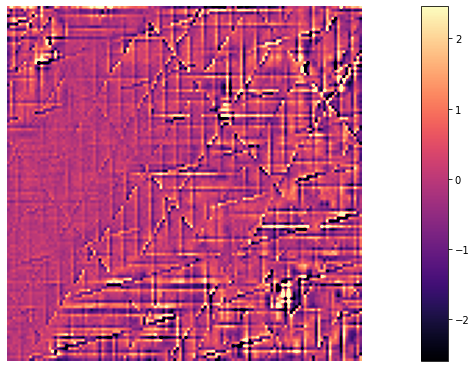

In [2]:
dem= images[:,:,13]
dem_richdem = rd.rdarray(dem, no_data=-9999) #convert to rdarray

dem_slope = rd.TerrainAttribute(dem_richdem, attrib="curvature") #calculate slope
rd.rdShow(dem_slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

<KeysViewHDF5 ['mask']>
(128, 128)


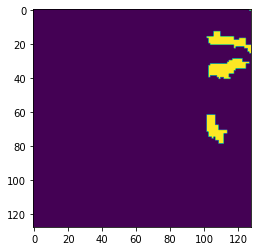

In [6]:
#load masks
example_mask = h5py.File(r'mask_1.h5','r')

# see what is inside that h5 file
print(example_mask.keys())

masks = example_mask['mask']
print(masks.shape)

plt.imshow(masks) #mask of the landslide area


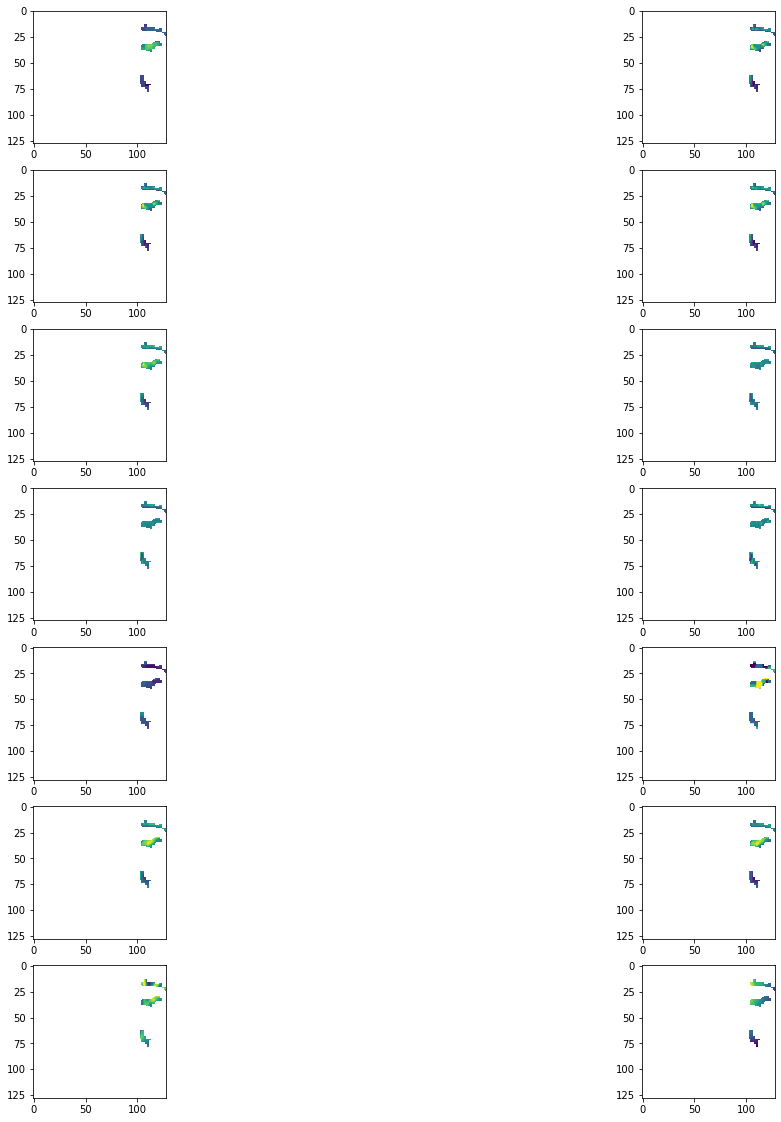

In [7]:
#masked rasters (i.e. terrain with and without landslides)

plt.subplots(1,figsize = (20,20))

for i in range(14):
    img_np = images[:,:,i]
    new_img_np= np.ma.array(img_np, mask=np.logical_not(masks)) #landslide
    #new_img_np= np.ma.array(img_np, mask=masks) #not landslide
    plt.subplot(7,2,1+i)
    plt.imshow(new_img_np)
plt.show()


In [6]:
new_img_np

masked_array(
  data=[[--, --, --, ..., --, --, 1.4492163887382412],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

In [8]:
#Select 50 random points from masked area and extract values LANDSLIDE
np.random.seed(123)#seed

coord_landslide= []
da_landslide= pd.DataFrame(columns= {"p/a", "x", "y"})
new_img_np= np.ma.array(img_np, mask=np.logical_not(masks)) #landslide mask

for j in range (50):
        x,y = np.where(new_img_np.mask <=False) #select only landslide values
        k = np.random.randint(len(x)) #select 30 random locations
        random_pos = [x[k],y[k]] #random locations
        coord_landslide.append(random_pos) #list of coordinates
        da_landslide.loc[j,["x"]]= random_pos[0] #table
        da_landslide.loc[j,["y"]]= random_pos[1] #table
        
for i in range(14):
    img_np= images[:,:,i] #each of the 14 bands
    for j in range (50):
        da_landslide.loc[j,[i]]= img_np[coord_landslide[j][0], coord_landslide[j][1]] #extract the values and put them in the table
        da_landslide.loc[j,["p/a"]]= 1 #landslide presence (table)


In [9]:
#Select 50 random points from masked area and extract values NOT LANDSLIDE
np.random.seed(123)#seed

coord_nolandslide= []
da_nolandslide= pd.DataFrame(columns= {"p/a", "x", "y"})
new_img_np= np.ma.array(img_np, mask=masks) #not landslide mask

for j in range (50):
        x,y = np.where(new_img_np.mask <=False) #select only not landslide values
        k = np.random.randint(len(x)) #select 30 random locations
        random_pos = [x[k],y[k]] #random locations
        coord_nolandslide.append(random_pos) #list of coordinates
        da_nolandslide.loc[j,["x"]]= random_pos[0] #table
        da_nolandslide.loc[j,["y"]]= random_pos[1] #table
        
for i in range(14):
    img_np= images[:,:,i] #each of the 14 bands
    for j in range (50):
        da_nolandslide.loc[j,[i]]= img_np[coord_landslide[j][0], coord_landslide[j][1]] #extract the values and put them in the table
        da_nolandslide.loc[j,["p/a"]]= 1 #landslide presence (table)

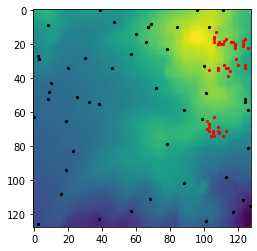

In [10]:
#plot
    
y_landslide, x_landslide = zip(*coord_landslide) #plotting the random coordinates on the map    
y_nolandslide, x_nolandslide = zip(*coord_nolandslide) #plotting the random coordinates on the map
plt.scatter(x_nolandslide,y_nolandslide, s= 5, c= "black")
plt.scatter(x_landslide,y_landslide, s= 5, c= "red")
plt.imshow(img_np)


In [10]:
#stack the two dataframe + file id
da= pd.concat([da_nolandslide, da_landslide], ignore_index=True, axis=0)
da["id"]= example_dt.filename
print(da)
len(da)

da.to_csv(r'C:\Users\serra\Downloads\File Name.csv', index = False)

      y p/a    x         0         1         2         3         4         5  \
0     3   1   29  1.153972  1.278146  1.416908  1.776838  1.537489  1.208217   
1     2   1  126  1.202541  1.369096  1.572165  2.005962  1.703160  1.283165   
2    19   1   94  1.207938  1.483086  1.790731  2.551818  2.142885  1.405279   
3    67   1   10  1.200742  1.228427  1.309886  1.599379  1.326916  0.814093   
4   113   1   98  1.346450  1.628606  1.921870  2.706813  2.325588  1.252798   
..  ...  ..  ...       ...       ...       ...       ...       ...       ...   
95  105   1   71  1.202541  1.332716  1.540511  1.893646  1.751158  1.285104   
96  114   1   39  1.296082  1.371521  1.603819  2.059874  1.882766  1.266367   
97  109   1   19  1.236719  1.512190  1.734959  2.470950  1.921474  1.034415   
98  112   1   32  1.300579  1.804442  2.188671  3.308827  2.339522  1.323224   
99  111   1   74  1.209737  1.228427  1.338526  1.579162  1.475556  1.101610   

           6         7         8       